# Machine Learning Basics
![Classification Example](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

## with sklearn
![sklearn](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)


>    * Simple and efficient tools for predictive data analysis
>    * Accessible to everybody, and reusable in various contexts
>    * Built on NumPy, SciPy, and matplotlib
>    * Open source, commercially usable - BSD license
>
>    &mdash; <cite>[https://scikit-learn.org/](https://scikit-learn.org/stable/)</cite>

In [ ]:
import pip
!pip install scikit-learn

## Machine Learning
A learning problem considers a data sample and then tries to predict properties of previously unknown data.

![ML Example](https://miro.medium.com/v2/resize:fit:720/1*R-ItxBW2SWarITBKe7HZuA.gif)

### The branches of Machine Learning
- **Supervised learning**: the data has an additional attribute ("label") that we want to predict $\rightarrow$ classification or regression
- **Unsupervised learning**: the data has no target value, we want to identify groups of similar samples $\rightarrow$ clustering
- **Reinforcement learning**: no data available, by interacting with an environment and correspondig reactions a system is trained

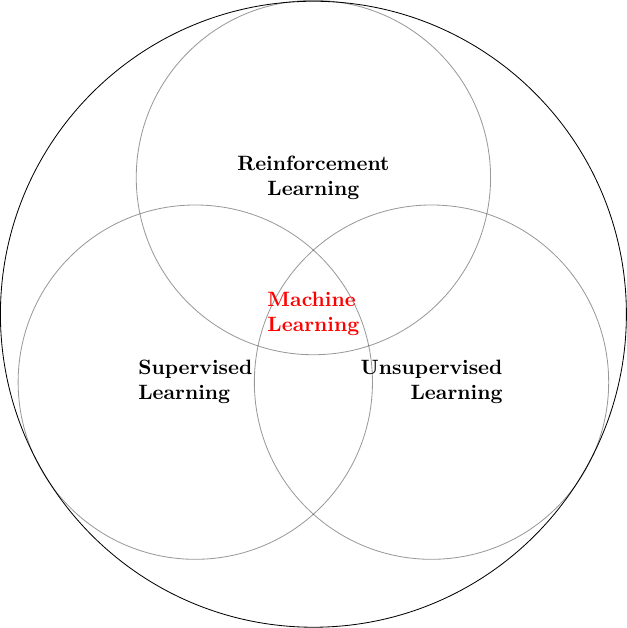

## Tackling Data Science Projects

![Data Science Lifecycle](https://ajgoldsteindotcom.files.wordpress.com/2017/11/ds-deconstructed.jpg?w=740)

## A Sample ML Project

![Titanic Image](https://miro.medium.com/max/720/1*qTqs-DD_i5dqUtTuaVzfWw.png)

## Data Dictionary

| Variable |                 Definition                 |                       Key                      |
|:--------:|:------------------------------------------:|:----------------------------------------------:|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |  fractional if less than 1                     |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |  definition of family on board                 |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |


For more information, please be refered to the dataset description on [kaggle.com](https://www.kaggle.com/c/titanic/data).


### 01. Frame the Problem
![Problem Framing Process](https://images.squarespace-cdn.com/content/v1/61f93f7493f91d77cb39464c/b5e3e004-a633-4f32-b432-28cbbc2cee42/Blog-Cover-Images-13.jpg)

> Ask a Lot of Questions
> - Translate ambigous requests into a  concrete, well-defined problem
> - Identify business priorities & strategy decisions that will influence your work

__Requirement / Task:__ We are given information about the passengers of the Titanic (e.g. gender, age, ticket category) and want to predict who survived the tragedy.

<a name="2"></a>
### 02. Collect Raw Data
![Data Collection](https://images.ctfassets.net/3viuren4us1n/288E0SWjmRgYQScyJeXpwt/19e6700ccf4f32dd638d73adad8279cc/data-collection---resized-3.jpg?fm=webp&w=828)

> Identify All Available Datasets
> - Web, internal/external databases, etc.
>
> Extract Data into Usable Format
> - .csv, .json, .xml, etc.

__Task:__ Load Data

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ADSLab-Salzburg/DataAnalysiswithPython/main/data/titanic.csv')
df.head()

<a name="3"></a>
### 03. Process the Data
![Data Processing](https://res.cloudinary.com/talend/image/upload/v1634323116/resources/seo-hubs/seo-subcategory-data-definitions_geenlt.png)

> Examine the Data at a High-Level
> - Understand every column, identify errors, missing values & corrupt records
>
> Clean the data
> - Throw away, replace, and/or filter corrupt / error prone / missing values

__Task:__ We need to understand what the columns mean and probably clean the data.

#### Is the PassengerID consecutive?

In [ ]:
df.tail() # ID and pandas index agree...

#### Do we know the survival status for each passenger?

In [ ]:
# isna() returns a boolean value -> sum > 0 would mean we have NaNs
df['Survived'].isna().sum()

#### How many passenger classes are there?

In [ ]:
df['Pclass'].value_counts()

#### Do we know the name, gender and age of each passenger?

Check if name column contains NaNs.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### How to handle NaN values?
- remove row
- remove feature (=column)
- replace
  - mean
  - median
  - zero (min)
  - max

In [ ]:
df['Age'].describe()

Let's replace the NaNs.

In [ ]:
df.loc[df['Age'].isna(), 'Age'] = df['Age'].mean()
df['Age'].describe()

#### What is the age distribution of the passengers?

In [ ]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,3))
df.boxplot(column='Age', ax=ax1)
df.hist(column='Age', ax=ax2)
plt.show()

#### How many passengers had siblings/spouses on board the Titanic?

The feature 'SibSp' gives the number of siblings/spouses on board.

In [ ]:
df['SibSp'].sum()

In [ ]:
df['SibSp'].astype(bool).sum()

#### How many passengers had parents/children on board the Titanic?
The feature 'Parch' gives the number of parents/children on board.

In [ ]:
df['Parch'].astype(bool).sum()

#### How much did the passengers pay for their ticket on average?

In [ ]:
df['Fare'].describe()

In [ ]:
df['Fare'].mean()

In [ ]:
plt.figure(figsize=(5,3))
df.boxplot(column='Fare')
plt.show()

#### Where did the passengers embark?

$$
\text{'Embarked'} \left\{\begin{array}{l}\text{S = Southampton} \\ \text{C = Cherbourg} \\ \text{Q = Queenstown} \end{array}\right.
$$

In [ ]:
df['Embarked'].value_counts()

#### Which features (=columns) are categorical, numerical etc.?

In [ ]:
df.columns.values

<a name="4"></a>
### 04. Explore the Data
> Play around with the data
> - Split, segment & plot the data in different ways
>
> Identify Patterns & Extract Features
> - Use statistics to identify & test significant variables

__Task:__ Exploratory Data Analysis

#### What is the survival rate of men and women?

In [ ]:
import seaborn as sns
# subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

women = df[df['Sex'] == 'female']
men = df[df['Sex'] == 'male']

# plot women
# sns.histplot(data=penguins, x="flipper_length_mm", hue="species")
sns.histplot(data=women, x="Age", ax=axes[0], hue="Survived")
axes[0].legend(labels=['survived', 'not survived'])
axes[0].set_title('Female')

# plot men
sns.histplot(data=men, x="Age", ax=axes[1], hue="Survived")
axes[1].legend(labels=['survived', 'not survived'], )
axes[1].set_title('Male')
plt.show()

#### Survival Rate by Ticket Price

In [ ]:
plt.figure(figsize=(5,3))
sns.violinplot(x="Survived", y="Fare", data=df)
plt.show()

### 05. Perform In-Depth Analysis

> Create a Predictive Model
> - Use feature vectors from step [#4](#4)
>
> Evaluate & Refine Model
> - Perhaps return to step [#2](#2), [3](#3), or [4](#4)

__Task:__ Build a Model

Given the training data for the binary classification problem "survival", we want to fit an estimator to be able to predict the class (0=not suvived, 1=survived) of previously unseen data (=test data).

In scikit-learn (sklearn), an estimator for classification is a Python object that implements the methods ``fit(X, y)`` and ``predict(T)``.

An example of an estimator is the ``DicisionTreeClassifier``, that learns simple dicision rules to classify the data. The estimator’s constructor takes as arguments the model’s parameters.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

### Training set and testing set

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the **training set**, on which we learn some properties. We call the other set the **testing set**, on which we test the learned properties.

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.8)
df_train.shape

In [ ]:
df_test.shape

**Let's get on training! Wait..**

In [ ]:
clf.fit(df_train[['Sex', 'Pclass']], df_train['Survived'])  

**We need numeric features!**
Here we return to [#4](#4).

In [ ]:
 # convert to categorical object and use codes instead of strings
df_train["Gender"] = df_train["Sex"].astype('category').cat.codes
df_test["Gender"] = df_test["Sex"].astype('category').cat.codes
df_train.head()

In [ ]:
clf.fit(X=df_train[['Gender', 'Pclass']], y=df_train['Survived'])  

### Predict on Test Data

In [ ]:
from sklearn import tree
y_pred = clf.predict(X=df_test[['Gender', 'Pclass']])
y_pred[:10]

#### Evaluation
Accuracy is a very simple measure to evalute the performance of the classifier on the test data. It gives you the number of correctly classified samples.

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(df_test['Survived'], y_pred)
print(f'The accuracy is {acc*100:.2f}%.')

#### Evaluation
The decision tree classifier is quite special, as we can also visualize, literally, the decisions it makes:

In [ ]:
from sklearn import tree
plt.figure(figsize=(10,3)) # needed, that we can see the figure properly
tree.plot_tree(clf, feature_names=['gender', 'passenger class'], class_names=['not survived', 'survived'])
plt.show()

#### Confusion plot
A more in-depth analysis is possible with a so called confusion matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df_test['Survived'], y_pred)
cm

### 06. Communicate Results

> Identify Business Insights
> - Return back to the business problem
>
> Visualize your findings
> - keep it simple & priority-driven
>
> Tell a Clear & Actionable Story
> - Effectively communicate to non-technical audiences

__Task:__ Visualize the Results

At least, plot the confusion matrix so that it is more interpretable.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Wrap-up Exercises

#### Wrap-up Exercise 1
Draw a plot showing the number of men and women who survived and did not survive on the test data only.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Wrap-up Exercise 2
Create a simple "classifier": Compute the accuracy score if all women would have been predicted as having survived, and men as not. $\rightarrow$ You can use the column "Gender" as ``y_pred``, directly.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Wrap-up Exercise 3

Add more columns (e.g. ``Age``) to train the decision tree classifier and check if the performance improves. What happens to the graphical output of the tree?

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

#### Wrap-up Exercise 4

Try out another classifier. Be sure to choose one where you can explain the _basic_ principle.
You can choose from this list:
- [Nearest Neighbor](https://scikit-learn.org/stable/modules/neighbors.html)
- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [Logistic regression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

Include a [Classification Report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) in your results.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## Further Reading
- [scikit-learn documentation](https://scikit-learn.org/stable/modules/classes.html#)

and see below:

[<img src="https://cloud.google.com/products/ai/ml-comic-1/assets/panel_01_2x.png" width=500>](https://cloud.google.com/products/ai/ml-comic-1/)